# Test OCR

This is not really expected to produce usable output.

In [1]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
from pytesseract import image_to_string
from ipywidgets import interact

In [2]:
DATA_DIR = Path('..') / 'data'
SHEET_FEED = DATA_DIR / 'old' / 'Sheetfeed'

IMAGE = str(SHEET_FEED / 'test0019.tif')

In [3]:
INCHES = 32


def show_image(image):

    fig, ax = plt.subplots(1, 1)

    ax.imshow(image, cmap='gray')
    ax.axis('off')

    fig.set_size_inches(INCHES, INCHES)
    plt.show()

(3321, 4467)


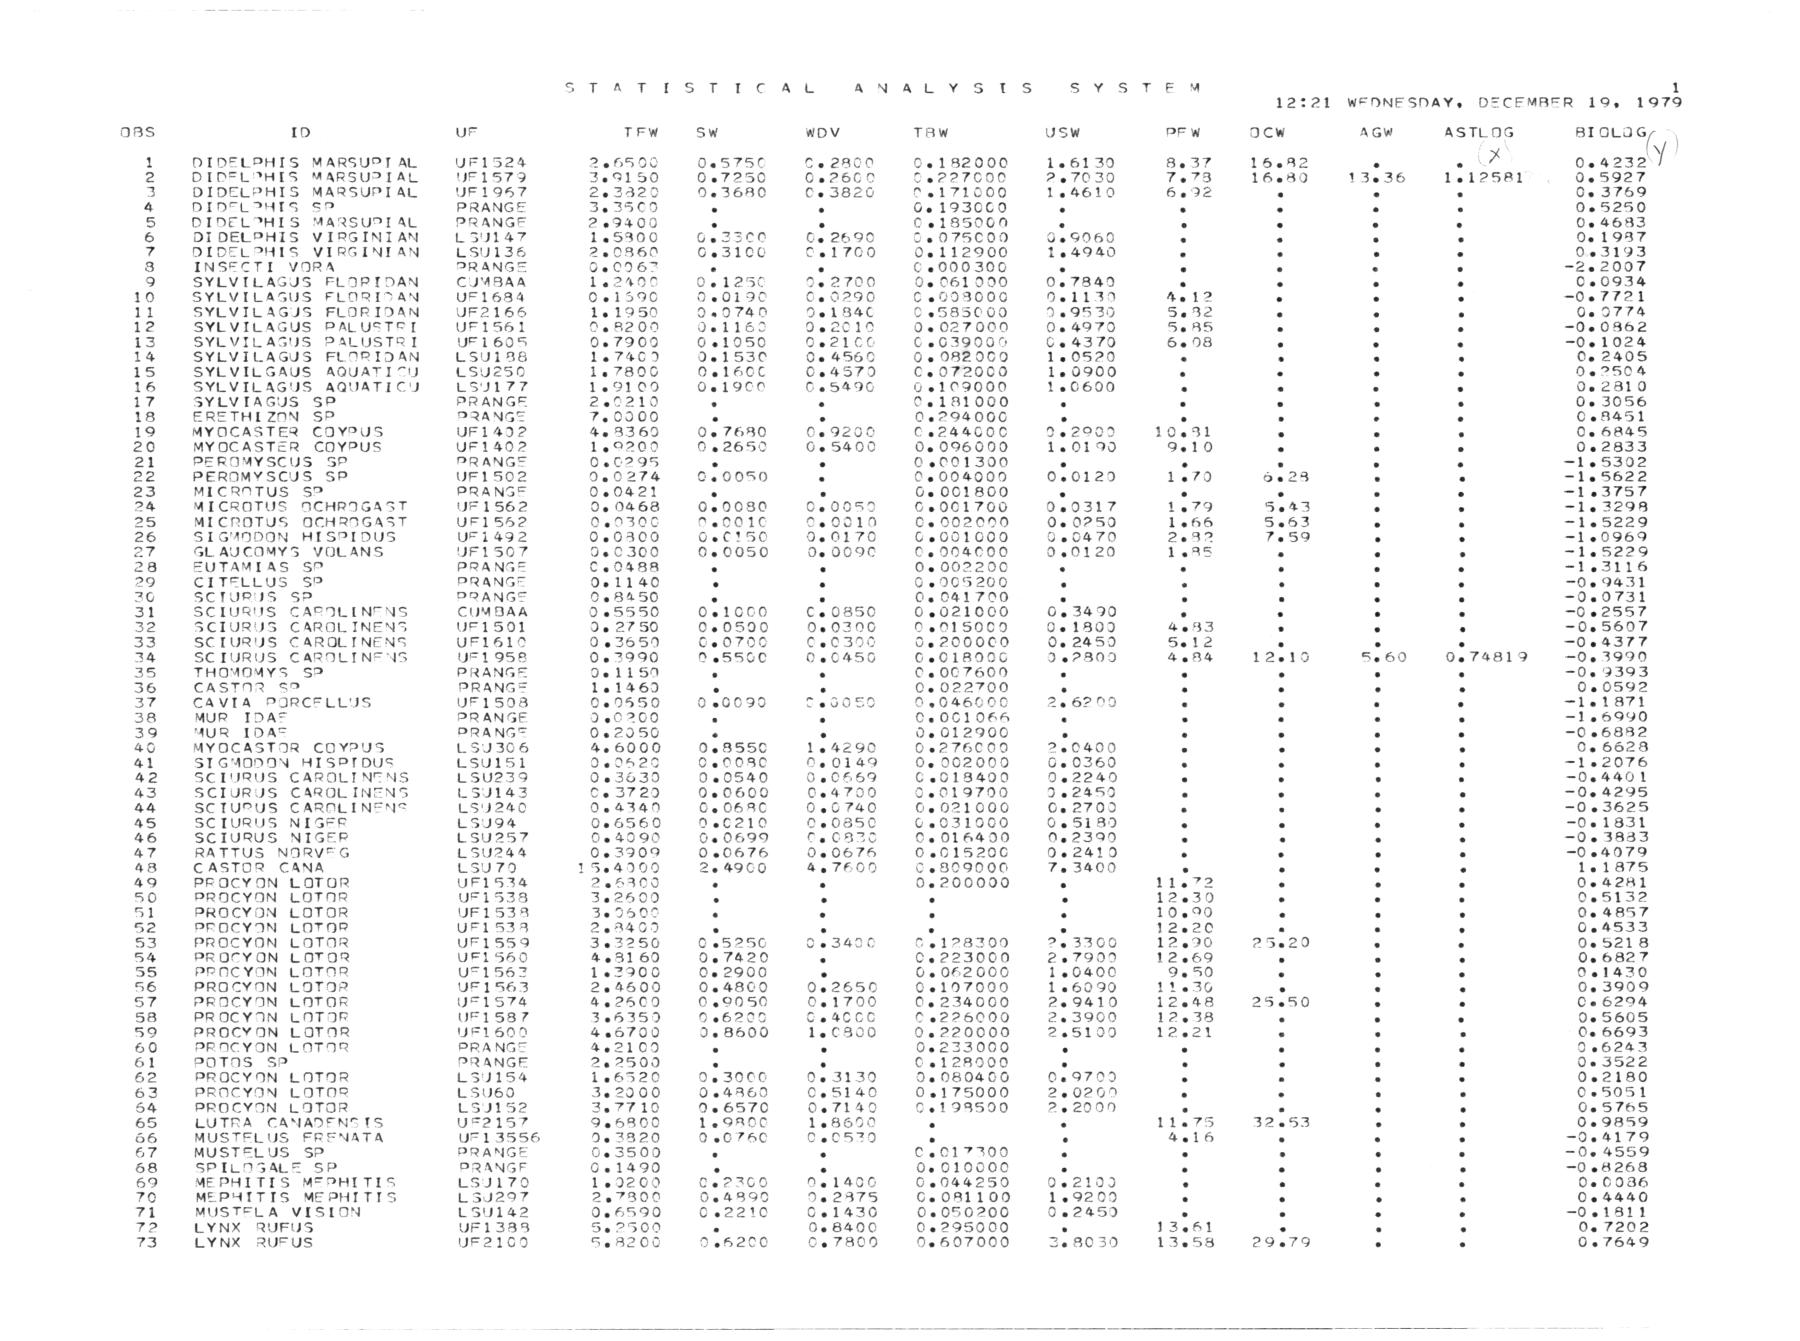

In [4]:
gray = cv2.imread(IMAGE, cv2.IMREAD_GRAYSCALE)
gray = cv2.rotate(gray, cv2.ROTATE_90_CLOCKWISE)

print(gray.shape)
show_image(gray)

In [5]:
ocr = image_to_string(gray, lang='eng', config='allometry.config')
print(ocr)

STA TFS TTtTCAL ANALY S Tt 5S SY S TEM 1

12221 WFONESDAY., DECEMBER 195 1979
OBS ID UF TFWw SW wOV TRW USW DFW o9CcWw AGW ASTLOG BIOLaG,

(VY!

1 DIDELPHIS MARSUST AL YF1I524 206590 0035750 Ce 2800 02182000 126139 Be 37 16282 . ° x o.azaa¥

2 DIDFLOHIS MARSUPTAL UFIS79 309150 007250 622609 0e227CO00 227030 7273 162389 13036 1212581 065927
3 DIDELPHIS MARSUPT AL UF1967 202320 923680 Ce 3826 2171000 1246190 6092 e © * Oe 3769
4 DIDTLPHTS sP PRANGE 323509 ° ° Ge i930C9 e ° ° ° ° 025250
5 DIDELPHIS MARSUPTAL PRANGE 209400 ° ° Ce185069 ° ° e ° ° 024633
6 DIDELPHIS VIRGINIAN LSIL47 1.5300 Ge2sctc Ce 2690 Ge2075C09 0290698 . ° ° . 001987
7 DIDELPHIS VIRGINIAN LSU136 220860 G6e3100 Cel 7090 02112900 124940 ° ° e . 023193
8 INSECTI VORA PRANGE GelI 62 * e 6 e000306 ° ° ° ° e —222007
9 SYLVTLAGUS FLOPIDAN CUMBAA 122400 021256 922700 Oe 061990 027849 ° ° ° ° 020934
10 SYLVILASGUS FLORITAN UF1634 021590 920190 600290 Ce593000 901139 4e12 ° ° . —“O407721
11 SYLVILAGJS FLORIDAN UF2166 161950 009745

In [6]:
kernel = np.ones((4, 4), np.uint8)

binary = None


def binarize(threshold):
    global binary
    print(threshold)

#     binary = cv2.threshold(gray, 0, threshold, cv2.THRESH_BINARY)[1]
#     binary = cv2.threshold(
#         gray, 0, threshold,
#         cv2.THRESH_OTSU)[1]

    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 2)

    show_image(binary)


# interact(binarize, threshold=(0, 255))

In [7]:
# ocr = image_to_string(binary, lang='eng', config='allometry.config')
# print(ocr)

In [8]:
# canny = cv2.Canny(binary, 60, 300)  
# canny = cv2.bitwise_not(canny)
# show_image(canny)

In [9]:
# ocr = image_to_string(canny, lang='eng', config='allometry.config')
# print(ocr)